<a href="https://colab.research.google.com/github/youyou2425/machine-learning-projects/blob/main/Medical_Insurance_Premium_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#download dataset
! kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 16.7MB/s]


In [3]:
#unzip file
! unzip /content/insurance.zip

Archive:  /content/insurance.zip
  inflating: insurance.csv           


In [38]:
#load data on dataframe
insurance_df = pd.read_csv('/content/insurance.csv')

In [39]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# save file to Google Drive permenently, index=False prevent saving index
insurance_df.to_csv('/content/drive/My Drive/Colab Notebooks/Medical insurance premium/insurance.csv', index=False)

In [7]:
insurance_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Medical insurance premium/insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [40]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**EDA**

In [12]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [13]:
insurance_df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<Axes: >

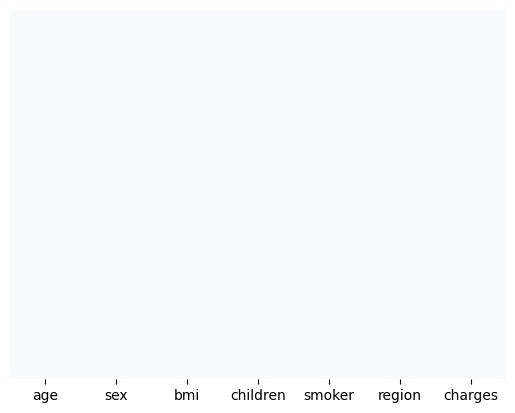

In [14]:
# check if there are any Null values
sns.heatmap(insurance_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [15]:
insurance_df.describe()  #get statistics only for numerical variables

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
print(insurance_df['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


In [46]:
# Grouping by region to see any relationship between region and charges
# south east region has the highest charges
df_region=insurance_df.groupby('region')['charges'].mean()
df_region

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [47]:
# Grouping by region to see any relationship between age and charges
# older ages have higher charges
df_age=insurance_df.groupby('age')['charges'].mean()
df_age

,charges
age,
18,7086.217556
19,9747.909335
20,10159.697736
21,4730.464330
22,10012.932802
23,12419.820040
24,10648.015962
25,9838.365311
26,6133.825309


Feature engineering

In [48]:
# Check unique values in the 'sex' column
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [8]:
# convert categorical variable to numerical
insurance_df['sex']=insurance_df['sex'].apply(lambda x: 0 if x=='female' else 1)

In [50]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [51]:
# Check the unique values in the 'smoker' column
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [9]:
# Convert categorical variable to numerical
insurance_df['smoker'] = insurance_df['smoker'].apply(lambda x: 0 if x == 'no' else 1)

In [53]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [10]:
region_dummies = pd.get_dummies(insurance_df['region'], drop_first = True)  #drop_first=True keep 3 columns to give enough info


In [55]:
region_dummies

,northwest,southeast,southwest
0,False,False,True
1,False,True,False
2,False,True,False
3,True,False,False
4,True,False,False
...,...,...,...
1333,True,False,False
1334,False,False,False
1335,False,True,False
1336,False,False,True


In [11]:
insurance_df = pd.concat([insurance_df, region_dummies], axis = 1)

In [57]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,False,False,True
1,18,1,33.770,1,0,southeast,1725.55230,False,True,False
2,28,1,33.000,3,0,southeast,4449.46200,False,True,False
3,33,1,22.705,0,0,northwest,21984.47061,True,False,False
4,32,1,28.880,0,0,northwest,3866.85520,True,False,False


In [12]:
# drop the original 'region' column
insurance_df.drop(['region'], axis = 1, inplace = True)


In [60]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


Data visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'children'}>],
       [<Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

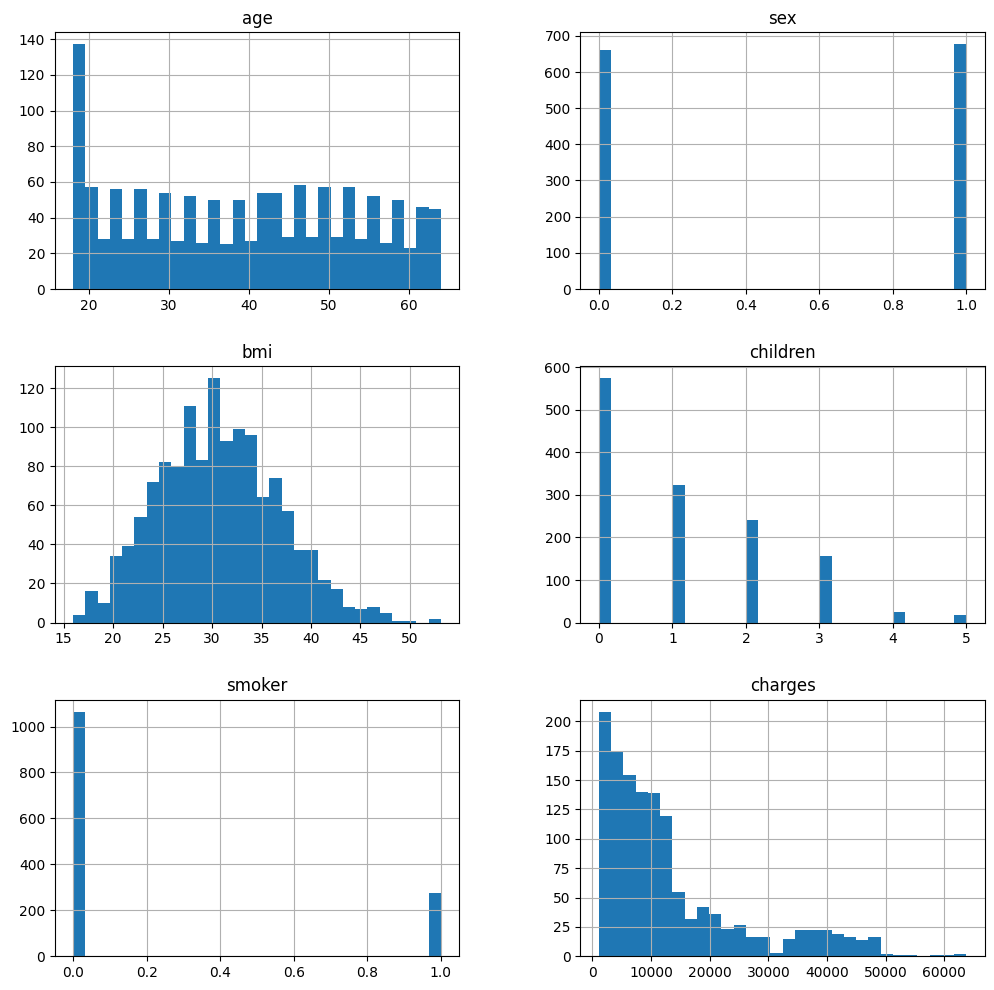

In [61]:
insurance_df[['age','sex','bmi','children','smoker','charges']].hist(bins=30, figsize=(12,12))

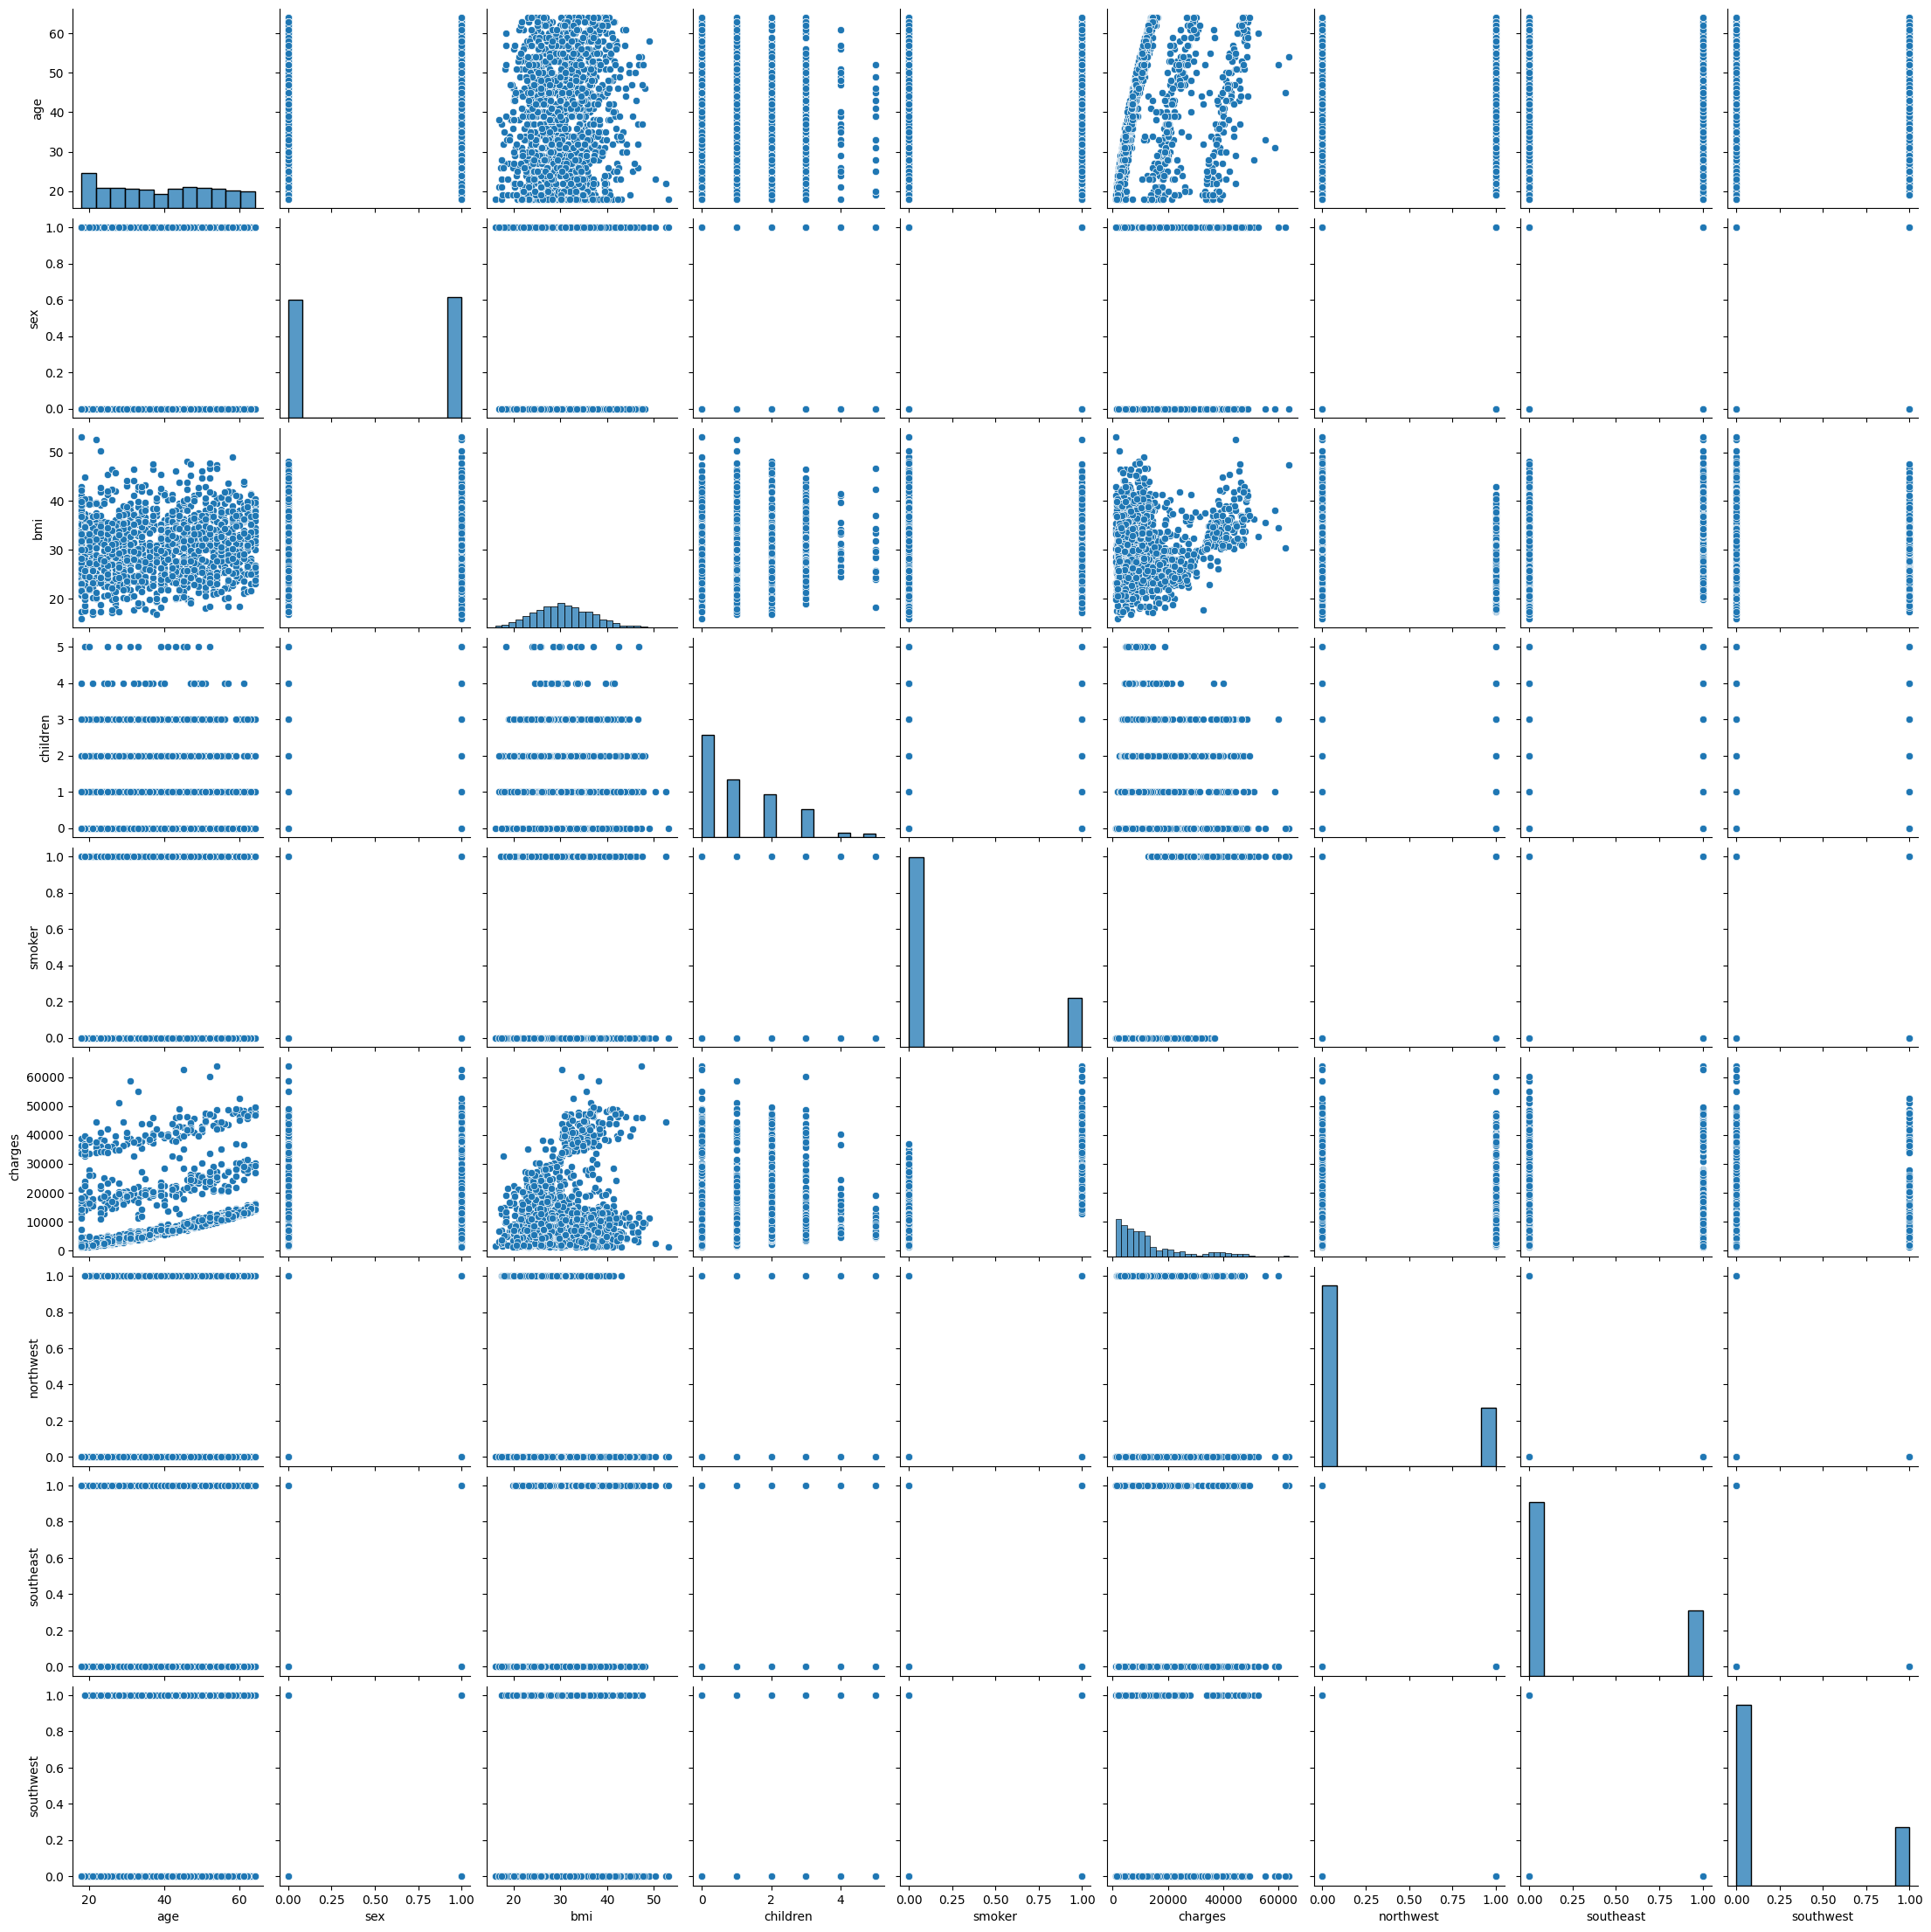

In [62]:
# plot pairplot
sns.pairplot(insurance_df)

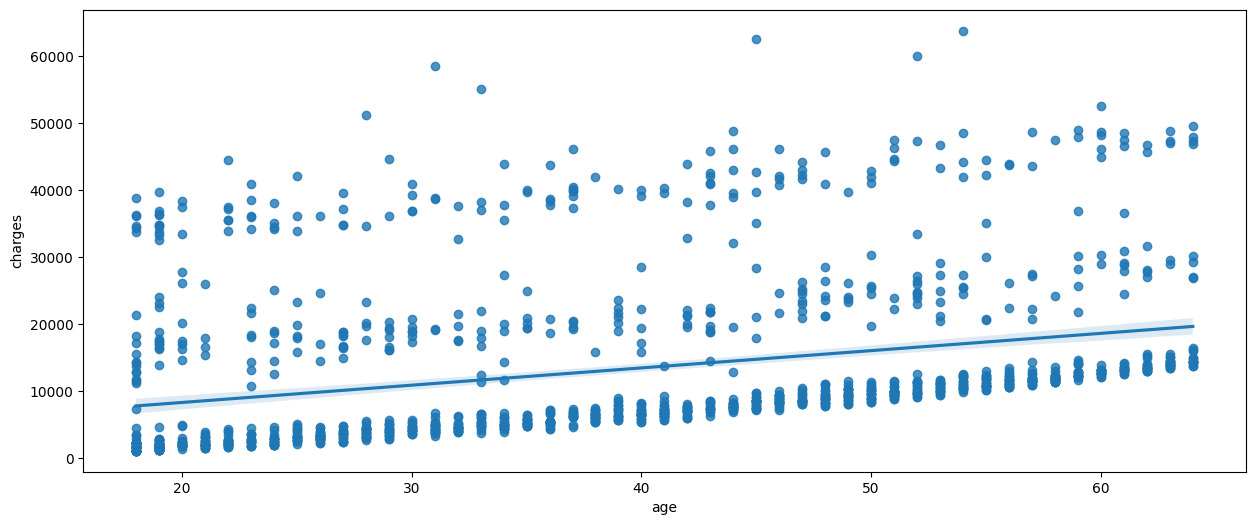

In [63]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'age', y = 'charges', data = insurance_df)
plt.show()


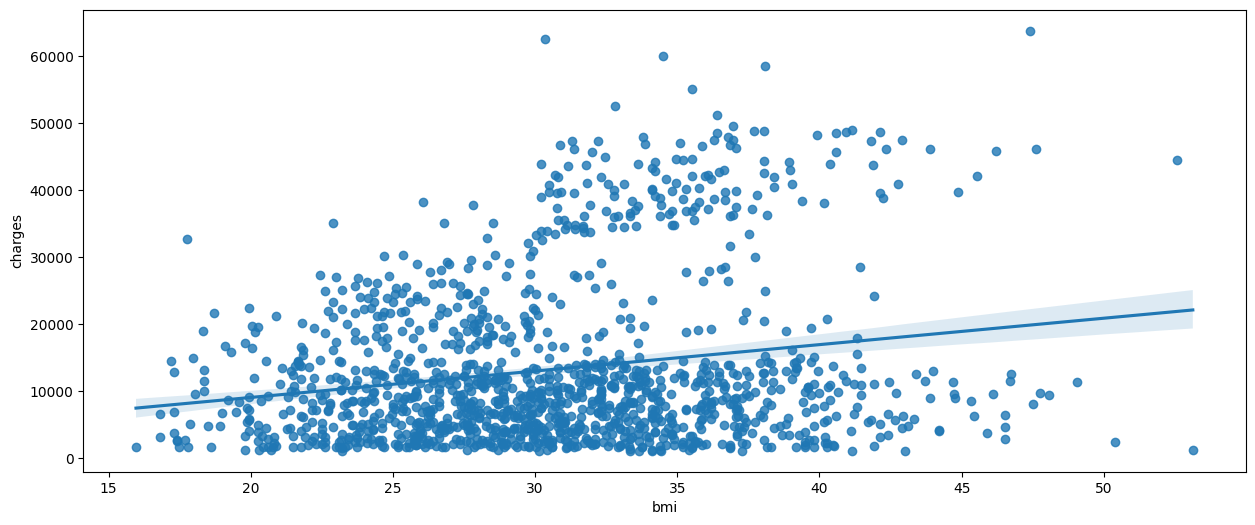

In [64]:
plt.figure(figsize = (15, 6))
sns.regplot(x = 'bmi', y = 'charges', data = insurance_df)
plt.show()


In [65]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


<Axes: >

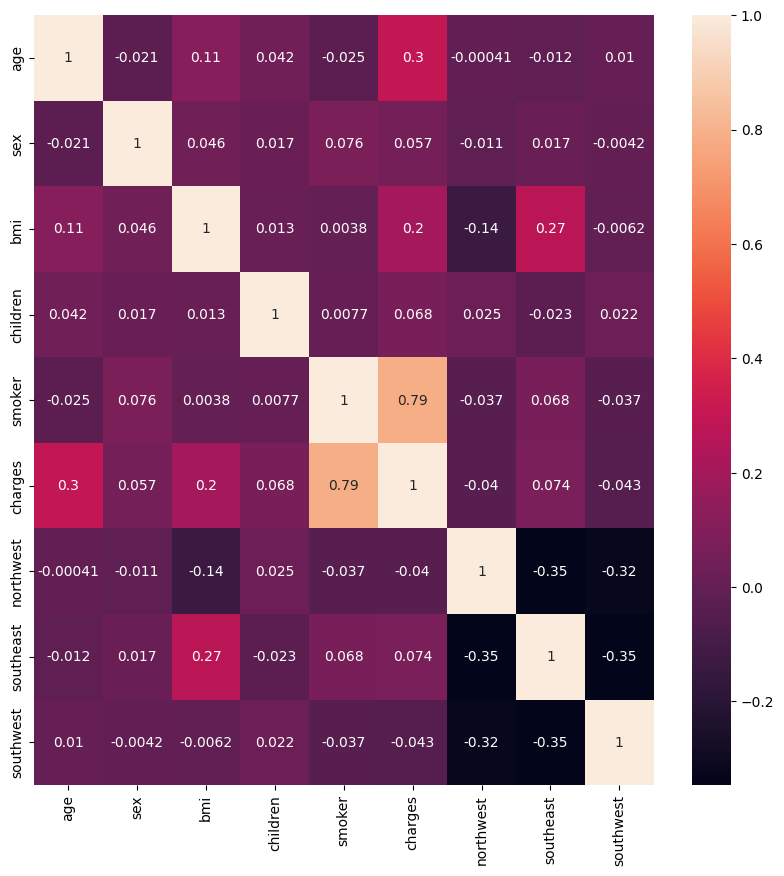

In [66]:
plt.figure(figsize=(10,10))
sns.heatmap(insurance_df.corr(), annot=True)


Create training and testing dataset

In [67]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [13]:
X=insurance_df.drop(columns=['charges'])  #X is 2-dimentional dataframe that has the right shape
y=insurance_df['charges']  #y is a 1-dimentional array, needs to reshape to 2-dimentional

In [69]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,False,False,True
1,18,1,33.770,1,0,False,True,False
2,28,1,33.000,3,0,False,True,False
3,33,1,22.705,0,0,True,False,False
4,32,1,28.880,0,0,True,False,False
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,True,False,False
1334,18,0,31.920,0,0,False,False,False
1335,18,0,36.850,0,0,False,True,False
1336,21,0,25.800,0,0,False,False,True


In [70]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [71]:
X.shape

(1338, 8)

In [72]:
y.shape

(1338,)

In [14]:
X = np.array(X).astype('float32')  #convert to Numpy array and change data type
y = np.array(y).astype('float32')  #convert to Numpy array and change data type

In [74]:
y.shape

(1338,)

In [15]:
y = y.reshape(-1,1)  #reshape y to be (number of samples, column=1)

In [76]:
X.shape  #X has the right shape, don't need to reshape

(1338, 8)

In [77]:
y.shape

(1338, 1)

In [78]:
# Only take the numerical variables and scale them
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [16]:
#scaling the data before feeding the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()  #y is also scaled because it's a continuous variable
y = scaler_y.fit_transform(y)


In [80]:
X

array([[-1.4387642 , -1.0105187 , -0.45332006, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [-1.5099654 ,  0.9895908 ,  0.5096212 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-0.79795355,  0.9895908 ,  0.38330686, ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       ...,
       [-1.5099654 , -1.0105187 ,  1.0148778 , ..., -0.5664179 ,
         1.6357946 , -0.5664179 ],
       [-1.2963619 , -1.0105187 , -0.79781353, ..., -0.5664179 ,
        -0.61132365,  1.765481  ],
       [ 1.5516857 , -1.0105187 , -0.261388  , ...,  1.765481  ,
        -0.61132365, -0.5664179 ]], dtype=float32)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


 Linear Regression in Scikit-learn

In [18]:
# using linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn=LinearRegression()
regression_model_sklearn.fit(X_train,y_train)

LinearRegression()

In [19]:
regresssion_model_sklearn_accuracy = regression_model_sklearn.score(X_test, y_test)
regresssion_model_sklearn_accuracy

0.7999876737594604

In [20]:
y_predict = regression_model_sklearn.predict(X_test)

In [21]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)


In [22]:
k = X_test.shape[1]
n = len(X_test)
n

268

In [23]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt


RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig) #R2=0.65 means 65% of the variations in the output has been represented by variations in the input
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5641.627 
MSE = 31827954.0 
MAE = 3933.2734375 
R2 = 0.7999876737594604 
Adjusted R2 = 0.7938096868485558


Train and evaluate an artificial neural network

In [41]:
import tensorflow as tf
import random
import os

# Set seeds for Python, NumPy, and TensorFlow
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Set environment variables for deterministic behavior
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["PYTHONHASHSEED"] = "42"

from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam


In [42]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8)) #layer 1
ANN_model.add(Activation('relu'))  #relu add or introduce nonlinearity to the neural network
ANN_model.add(Dense(150))  #layer 2
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150)) #layer 3
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(50)) #layer 4
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1)) #output of the network
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train,y_train,epochs=100, batch_size=20, validation_split=0.2)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6733 - val_loss: 0.2947
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1894 - val_loss: 0.2507
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.1559 - val_loss: 0.2445
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.1452 - val_loss: 0.2480
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1363 - val_loss: 0.2472
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1320 - val_loss: 0.2488
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1272 - val_loss: 0.2502
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1250 - val_loss: 0.2510
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1210 - val_loss: 0.2562
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1180 - val_loss: 0.2574
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1166 - val_loss: 0.2591
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 

In [44]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1949 
Accuracy : 0.7917197197675705


In [107]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

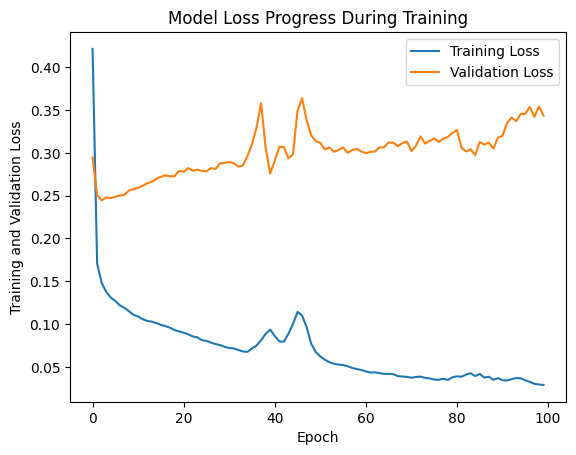

In [45]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Training loss decreases but validation loss starts increasing, the model is overfitting and needs regularization technique

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'True Values')

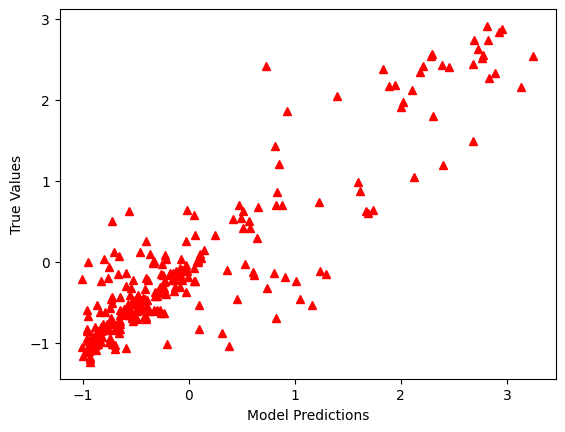

In [46]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')  #should be a straight line with 45 angel if perfect prediction
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [47]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

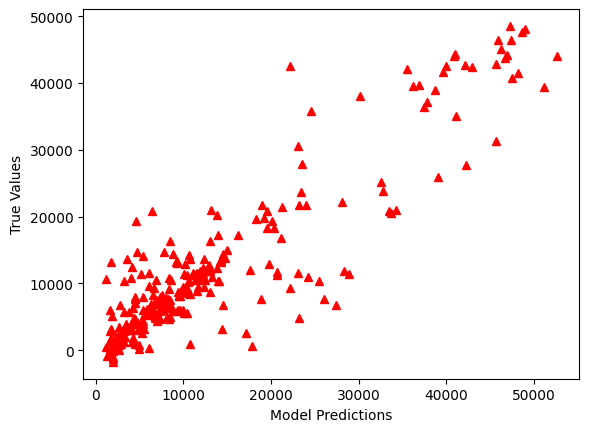

In [48]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [49]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)  #R2 improved from 0.69 to 0.83 indicating a better fit after adding dropout layer to prevent overfitting
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 5524.669 
MSE = 30521966.0 
MAE = 3507.459716796875 
R2 = 0.8081947565078735 
Adjusted R2 = 0.8022702702224025


Add Dropout to prevent overfitting and improve network generalization ability

In [50]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')
epochs_hist = ANN_model.fit(X_train,y_train,epochs=100, batch_size=20, validation_split=0.2)


Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0050 - val_loss: 0.3750
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3796 - val_loss: 0.3635
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3226 - val_loss: 0.3423
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2695 - val_loss: 0.2845
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.2292 - val_loss: 0.3414
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2570 - val_loss: 0.3163
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2355 - val_loss: 0.3066
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2370 - val_loss: 0.3012
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2497 - val_loss: 0.3188
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2059 - val_loss: 0.2599
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2243 - val_loss: 0.2730
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.

In [52]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1370 
Accuracy : 0.8594884723424911


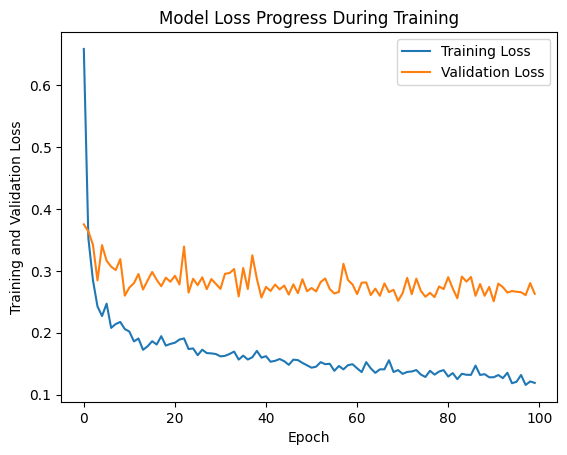

In [53]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Text(0, 0.5, 'True Values')

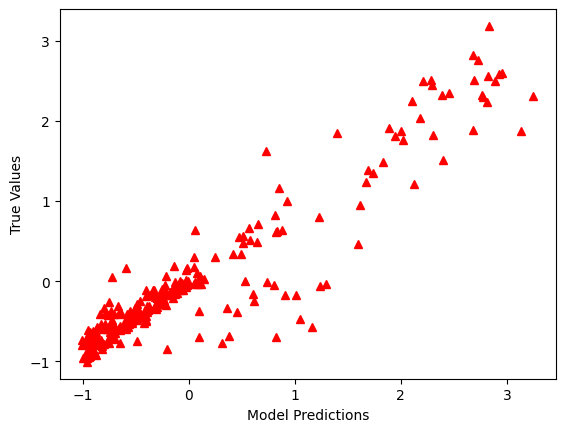

In [54]:
y_predict = ANN_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')  #should be a straight line with 45 angel if perfect prediction
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [55]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

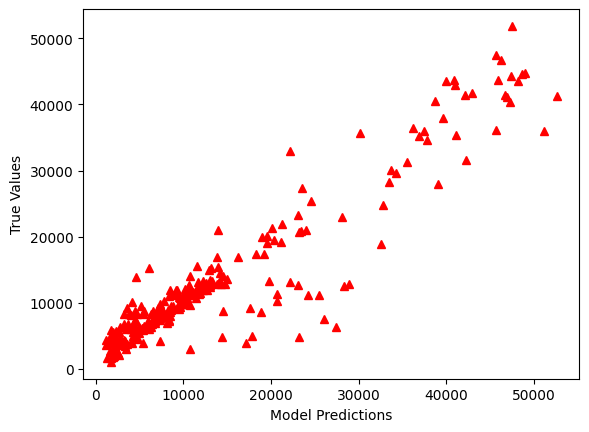

In [56]:
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [57]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)  #R2 improved from 0.81 to 0.87 indicating a better fit after adding dropout layer to prevent overfitting
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 4537.725 
MSE = 20590948.0 
MAE = 2714.821044921875 
R2 = 0.8706029653549194 
Adjusted R2 = 0.8666061457519826


Add early stopping before overfitting starts

In [58]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 8))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 150)                 │           7,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 150)                 │          22,650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_22 (Activation)           │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 50)                  │           7,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_23 (Activation)           │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 38,351 (149.81 KB)

 Trainable params: 38,351 (149.81 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

# Train the model with EarlyStopping
epochs_hist = ANN_model.fit(X_train, y_train,
                            epochs=100,
                            batch_size=20,
                            validation_split=0.2,
                            callbacks=[early_stopping])

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 1.0183 - val_loss: 0.4240
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4300 - val_loss: 0.3093
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2909 - val_loss: 0.3273
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3213 - val_loss: 0.2834
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2219 - val_loss: 0.3174
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2769 - val_loss: 0.2767
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2199 - val_loss: 0.3078
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2462 - val_loss: 0.2998
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2047 - val_loss: 0.2912
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2065 - val_loss: 0.2861
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.2210 - val_loss: 0.2944


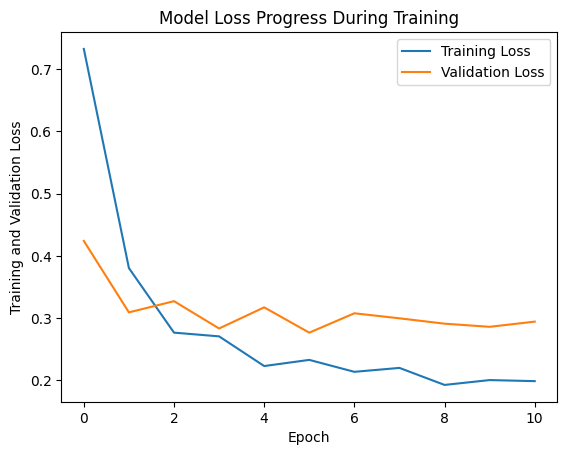

In [60]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.savefig('training_validation_loss.png')

In [63]:
from google.colab import files
files.download('training_validation_loss.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
y_predict = ANN_model.predict(X_test)
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [62]:
k = X_test.shape[1]
n = len(X_test)
n

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)  #R2 improved from 0.81 to 0.86 indicating a better fit after adding dropout layer to prevent overfitting
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 4691.369 
MSE = 22008940.0 
MAE = 3133.281982421875 
R2 = 0.8616920709609985 
Adjusted R2 = 0.8574200113767823


In [66]:
# Save trained model
ANN_model.save("/content/drive/MyDrive/Colab Notebooks/Medical insurance premium/model_weights.keras")

In [ ]:
# Load model in a new session
ANN_model.load_weights("/content/drive/MyDrive/Colab Notebooks/Medical insurance premium/model_weights.keras")

In [67]:
import joblib

# Save the best model to a file
joblib.dump(ANN_model, "/content/drive/My Drive/Colab Notebooks/Medical insurance premium/best_ANN_model.pkl")

['/content/drive/My Drive/Colab Notebooks/Medical insurance premium/best_ANN_model.pkl']

In [68]:
import joblib

# Load the model from the Colab environment's file path
best_model = joblib.load("/content/drive/My Drive/Colab Notebooks/Medical insurance premium/best_ANN_model.pkl")

# Check the loaded model
print(best_model)

<Sequential name=sequential_5, built=True>


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
